# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Для сопоставления значений мы рассчитали процент должников по всем заемщикам:

In [22]:
total_debtors = data[data['debt'] == 1]['debt'].count()
total = data['debt'].count()
total_debtors_percent = (total_debtors/total)*100
print(f'Кол-во человек в выборке: {total}\nКол-во должников: {total_debtors}\nПроцент должников из всей выборки составляет: {total_debtors_percent:.2f}%')

Кол-во человек в выборке: 21331
Кол-во должников: 1732
Процент должников из всей выборки составляет: 8.12%


#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
debt_children_percent = data.groupby('children').agg({'debt': ['count', 'sum', 'mean']})
debt_children_percent['%'] = debt_children_percent['debt']['mean']*100
debt_children_percent = debt_children_percent.reset_index()
debt_children_percent

children   debt                         %
            count   sum      mean          
0        0  14091  1063  0.075438  7.543822
1        1   4808   444  0.092346  9.234609
2        2   2052   194  0.094542  9.454191
3        3    330    27  0.081818  8.181818
4        4     41     4  0.097561  9.756098
5        5      9     0  0.000000  0.000000

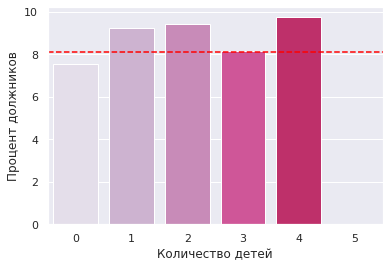

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
sns.set_style("darkgrid")
sns.set_palette('PuRd')
g = sns.barplot(x=debt_children_percent['children'], y=debt_children_percent['%'])
g.set(xlabel="Количество детей",
ylabel="Процент должников")
g.axhline(8.12, color='red', linestyle='--')
plt.show()

**Вывод:** 

Первый взгляд на график показывает, что зависимости нет, но в таблице группировки мы видим, что категории 3, 4, 5 детей встречаются в 1.8% наблюдений. Соответственно, если мы посмотрим на остальные категории, то становится заметно, что заемщики без детей гораздо реже становятся должниками (7.5% против 9.2% и 9.5%). 
Те, у кого есть дети, чаще, чем в среднем по выборке (8.12%) имеют задолженность. Те, у кого нет детей - реже.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
debt_fam_type_percent = data.groupby('family_status_id').agg({'debt': ['count', 'sum', 'mean']})
debt_fam_type_percent['%'] = debt_fam_type_percent['debt']['mean']*100
debt_fam_type_percent = debt_fam_type_percent.reset_index()
debt_fam_type_percent

family_status_id   debt                        %
                    count  sum      mean          
0                0  12261  927  0.075606  7.560558
1                1   4134  385  0.093130  9.313014
2                2    951   63  0.066246  6.624606
3                3   1189   84  0.070648  7.064760
4                4   2796  273  0.097639  9.763948

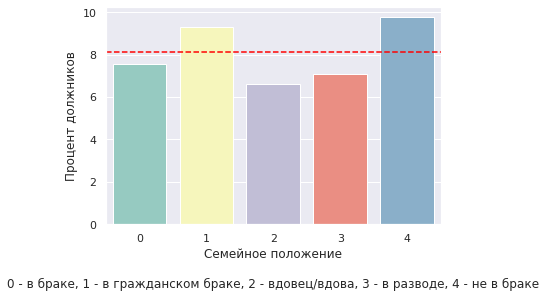

In [26]:
sns.set_palette('Set3')
g = sns.barplot(x=debt_fam_type_percent['family_status_id'], y=debt_fam_type_percent['%'])
g.set(xlabel="Семейное положение\n\n0 - в браке, 1 - в гражданском браке, 2 - вдовец/вдова, 3 - в разводе, 4 - не в браке",
ylabel="Процент должников")
g.axhline(8.12, color='red', linestyle='--')
plt.show()

**Вывод:** 

Те, кто не в браке и те, кто в гражданском браке чаще становятся должниками, чем все остальные категории - 9.3% и 9.76%. Оба эти значения выше среднего по всей выборке в целом. Все остальные категории ниже среднего по всей выборке. Среди них незначительно выше процент должников у тех, кто в браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
debt_inc_cat_percent = data.groupby('total_income_category').agg({'debt': ['count', 'sum', 'mean']})
debt_inc_cat_percent['%'] = debt_inc_cat_percent['debt']['mean']*100
debt_inc_cat_percent = debt_inc_cat_percent.reset_index()
debt_inc_cat_percent

total_income_category   debt                         %
                         count   sum      mean          
0                     A     25     2  0.080000  8.000000
1                     B   5014   354  0.070602  7.060231
2                     C  15921  1353  0.084982  8.498210
3                     D    349    21  0.060172  6.017192
4                     E     22     2  0.090909  9.090909

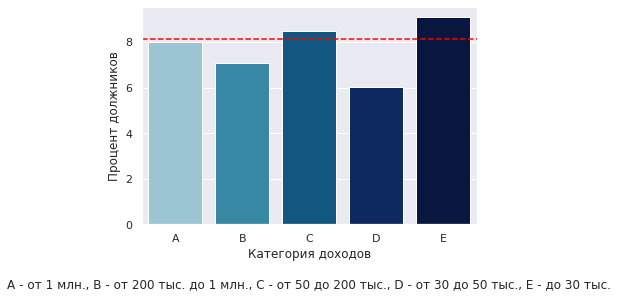

In [28]:
sns.set_palette('ocean_r')
g = sns.barplot(x=debt_inc_cat_percent['total_income_category'], y=debt_inc_cat_percent['%'])
g.set(xlabel="Категория доходов\n\nA - от 1 млн., B - от 200 тыс. до 1 млн., C - от 50 до 200 тыс., D - от 30 до 50 тыс., E - до 30 тыс.",
ylabel="Процент должников")
g.axhline(8.12, color='red', linestyle='--')
plt.show()

**При первоначальной категоризации заемщиков по уровню дохода не заметна прямая связь между этим показателем и количеством должников. Группа с наименьшим доходом - Е - чаще всего имеют задолженность. В то же время, группа с незначительно большим доходом - D - реже всего имеет задолженность. При этом, эти две категории с наименьшим доходом содержат менее 2% наблюдений, тогда как категория С - от 50 до 200 тыс. - содержит порядка 75% всех наблюдений.**

**Попробуем разбить эту категорию на меньшие интервалы - 20 тыс.**

Создаем новую функцию для категоризации доходов с измененными диапазонами:

<blockquote>
<i>A - от 1 млн.
B - от 200 тыс. до 1 млн.
C - от 50 до 200 тыс.
C1 - 50-70 тыс.
С2 - от 70 до 90 тыс.
С3 - от 90 до 110 тыс.
С4 - от 110 до 130 тыс.
С5 - от 130 до 150 тыс.
С6 - от 150 до 170 тыс.
С7 - от 170 до 200 тыс.
D - от 30 до 50 тыс.
E - до 30 тыс.</i>


In [29]:
def categorize_income_new(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 70000:
            return 'C7'
        elif 70001 <= income <= 90000:
            return 'C6'
        elif 90001 <= income <= 110000:
            return 'C5'
        elif 110001 <= income <= 130000:
            return 'C4'
        elif 130001 <= income <= 150000:
            return 'C3'
        elif 150001 <= income <= 170000:
            return 'C2'
        elif 170001 <= income <= 200000:
            return 'C1'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [30]:
data['total_income_category_new'] = data['total_income'].apply(categorize_income_new)

In [31]:
debt_inc_cat_percent_new = data.groupby('total_income_category_new').agg({'debt': ['count', 'sum', 'mean']})
debt_inc_cat_percent_new['%'] = debt_inc_cat_percent_new['debt']['mean']*100
debt_inc_cat_percent_new = debt_inc_cat_percent_new.reset_index()
debt_inc_cat_percent_new

total_income_category_new  debt                        %
                             count  sum      mean          
0                          A    25    2  0.080000  8.000000
1                          B  5014  354  0.070602  7.060231
2                         C1  2638  218  0.082638  8.263836
3                         C2  2100  185  0.088095  8.809524
4                         C3  3269  293  0.089630  8.962986
5                         C4  2668  225  0.084333  8.433283
6                         C5  2284  193  0.084501  8.450088
7                         C6  1869  161  0.086142  8.614232
8                         C7  1093   78  0.071363  7.136322
9                          D   349   21  0.060172  6.017192
10                         E    22    2  0.090909  9.090909

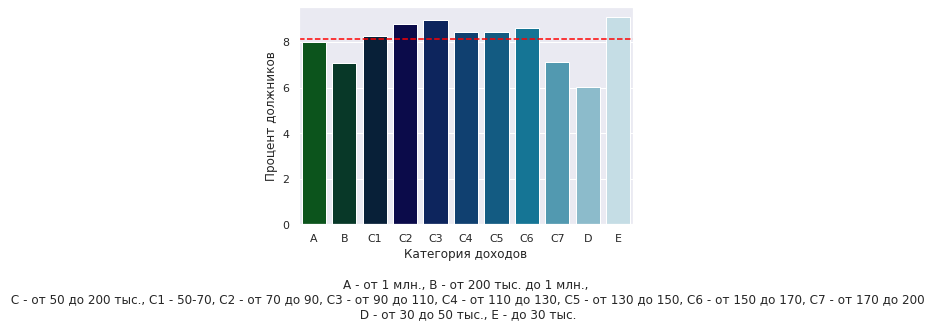

In [32]:
g = sns.barplot(x=debt_inc_cat_percent_new['total_income_category_new'], y=debt_inc_cat_percent_new['%'], palette='ocean')
g.set(xlabel="Категория доходов\n\nA - от 1 млн., B - от 200 тыс. до 1 млн.,\n C - от 50 до 200 тыс., C1 - 50-70, С2 - от 70 до 90, С3 - от 90 до 110, С4 - от 110 до 130, С5 - от 130 до 150, С6 - от 150 до 170, С7 - от 170 до 200\n D - от 30 до 50 тыс., E - до 30 тыс.",
ylabel="Процент должников")
g.axhline(8.12, color='red', linestyle='--')
plt.show()

**Вывод:** 

Опять прямой связи между тем, сколько человек получает, и будет ли он должником, не видно. Выбивается категория С7, она ниже среднего по общей выборке. Все остальные подкатегории С выше среднего.  

Обеспеченные люди представлены в двух категориях - A и В. Процент должников в категории А близок к среднему по всей выборке, в то же время процент должников в категории В значительно ниже среднего - 7.06%. Если мы посмотрим на таблицу, то увидим, что в категории А всего 25 наблюдений, а в категории В - 5000 наблюдений. Таким образом, мы все-таки можем сделать вывод о том, что богатые люди (с доходом от 200 тысяч) значительно реже становятся должниками.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [33]:
debt_cat_percent = data.groupby('purpose_category').agg({'debt': ['count', 'sum', 'mean']})
debt_cat_percent['%'] = debt_cat_percent['debt']['mean']*100
debt_cat_percent = debt_cat_percent.reset_index()
debt_cat_percent

purpose_category   debt                        %
                             count  sum      mean          
0    операции с автомобилем   4279  400  0.093480  9.347978
1  операции с недвижимостью  10751  780  0.072551  7.255139
2     получение образования   3988  369  0.092528  9.252758
3        проведение свадьбы   2313  183  0.079118  7.911803

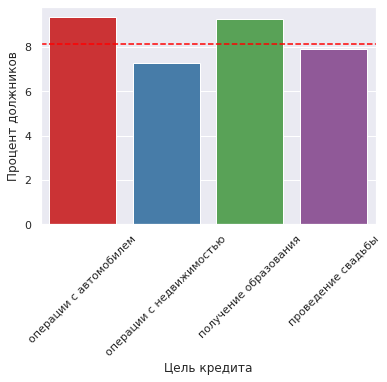

In [34]:
sns.set_palette('Set1')
g = sns.barplot(x=debt_cat_percent['purpose_category'], y=debt_cat_percent['%'])
g.set(xlabel="Цель кредита",
ylabel="Процент должников")
plt.xticks(rotation=45)
g.axhline(8.12, color='red', linestyle='--')
plt.show()

**Вывод:** 

Мы видим, что операции с недвижимостью это наименее рискованная для банка категория. Соответсвенно, процент должников в ней составляет 7.26%, что почти на 1% ниже среднего по всей выборке. Операции с автомобилем и получение образования значительно выше среднего по выборке, по 9.3% процента. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Пропуски данных были одновременно в двух столбцах -  доход и стаж. Соответственно, первый способ того, как объяснить пропуски - предположить, что это безработные: у них нет дохода и они никогда не работали. Но в данных есть категории по типу занятости, и в них всего два наблюдения по безработным. То есть, если мы доверяем столбцу о типе занятости, значит, "безработными" эти пропуски назвать нельзя.

**Есть гипотеза, что не под все цели кредитов нужно получение данных о зарплате и трудовом стаже (что об этом не спрашивают в банке). Предположим, что для цели кредита, связанной с образованием, указание этих данных не обязательно.**

Для проверки гипотизы восстановим пропуски, которые на первом этапе заполнили медианным значением дохода по каждой категории (данный вариант выбран, чтобы не изменять предыдущую часть проекта) 

In [35]:
#восстанавливаем медианы для категорий. это возможно, так как они были заполнены именно медианным значением

medians = []
unique_cats = list(data['income_type'].unique())
for t in unique_cats:
    medians.append(data.loc[data['income_type'] == t]['total_income'].median())
unique_cats = list(data['income_type'].unique())
for i in range(len(unique_cats)):
    print(f'Для категории {unique_cats[i]} медиана составляет {medians[i]}\n')

Для категории сотрудник медиана составляет 142594.0

Для категории пенсионер медиана составляет 118514.0

Для категории компаньон медиана составляет 172357.0

Для категории госслужащий медиана составляет 150447.0

Для категории безработный медиана составляет 131339.0

Для категории предприниматель медиана составляет 499163.0

Для категории студент медиана составляет 98201.0

Для категории в декрете медиана составляет 53829.0



In [36]:
#считаем количество пропусков в каждой категории занятости.
"""
два пропуска в категории предприниматель, где всего два значения в датасете, объясняются тем, что был один пропуск, который
заполнили медианой, поэтому значения одинаковые и при нашем методе восстановления показались, как пропуски.
"""
for i in range(len(medians)):
    missed_val = data[data['total_income'] == medians[i]]['total_income'].count()
    print(f'Пропусков в категории {unique_cats[i]}: {missed_val}\n')

Пропусков в категории сотрудник: 1066

Пропусков в категории пенсионер: 384

Пропусков в категории компаньон: 498

Пропусков в категории госслужащий: 144

Пропусков в категории безработный: 0

Пропусков в категории предприниматель: 2

Пропусков в категории студент: 1

Пропусков в категории в декрете: 1



In [37]:
#функция, которая проверяет, есть ли значение дохода в списке медианных значений (которыми заполняли пропуски) и пишет в столбце

def restore_missed_values(row):
    if row['total_income'] in medians:
        return 'm'
    else:
        return ''
data['missed'] = data.apply(restore_missed_values, axis=1)
data_missed = data[data['missed'] == 'm']  

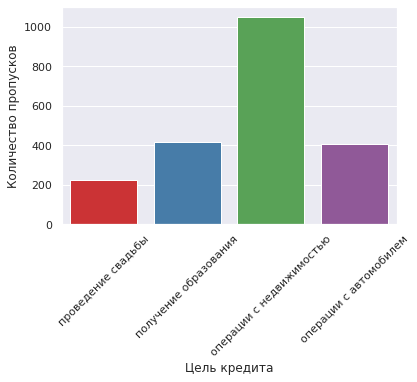

In [38]:
#график количества пропущенных значений 

g = sns.countplot(x='purpose_category', data=data_missed)
g.set(xlabel="Цель кредита",
ylabel="Количество пропусков")
plt.xticks(rotation=45)
plt.show()

**По графику видно, что гипотеза о том, что пропуски в значениях связаны с определенной целью кредита, а именно, с получением образования, не подтвердилась.**

Если посмотреть на остальные столбцы, кажется, что содержательно они не могут объяснить пропуски.

Таким образом, скорее всего, имела место техническая ошибка при выгрузке данных либо ошибка, связанная с человеческим фактором.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Для количественных переменных существует много способов заполнения пропущенных значений, какой из них правильнее выбрать зависит от ситуации. 

В данном проекте были пропуски в данных в столбцах про доход и про трудовой стаж. Как описано выше, пропуски (скорее всего) связаны именно с технической ошибкой - то есть, например, пропущенные значения нельзя просто заполнить нулем. 

Заполнение средним значением используется в случаях, где разброс данных невелик. В нашем случае это не является правдой: у нас есть зарплаты и 30 тысяч, и 500. Для таких случаев лучше использовать медианное значение, так как на него разброс данных не влияет так сильно, как на среднее. 



 


### Шаг 4: общий вывод.

Задачей данного исследования было выявление зависимости между семейным положением, целью оформления кредита, уровнем дохода и способностью человека погасить кредит в срок, не превращаясь в должника. 

Банк предоставил набор данных с относительно небольшим числом пропущенных значений, которые было возможно эффективно восполнить, так как они, скорее всего, появились из-за технической ошибки.

Построение таблиц с группировками и графиков показало, что разброс значений максимального и минимального процента должников среди всех заемщиков, вычисленный по различным категориям, относительно небольшой, максимум около 3% в зависимости от категории. Также видно, что значения все сосредоточены около значения процента должников по всей выборке - 8.12%.

Лучше всего были видны зависимости при рассмотрении семейного положения и уровня дохода. 


Так как по заданию езультаты исследования будут учтены при построении модели кредитного скоринга, возможно, следует изучить данные подробнее, использовать при этом более узкие категории (как когда мы разбили зарплату на более мелкие категории, чем первоначально) - учитывать пол заемщиков, их образование, трудовой стаж и возраст. Возможно, при исследовании этих факторов появятся результаты с гораздо более очевидной зависимостью, нежели чем при рассмотрении семейного положения, целью оформления кредита и уровнем дохода.